### ***In statistics, family-wise error rate (FWER) is the probability of making one or more false discoveries, or type I errors when performing multiple hypotheses tests.***

for 5% significance level: 


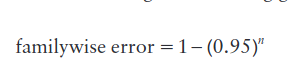

In [464]:
from IPython.display import Image

print('for 5% significance level: ')
Image('familywise.png')

In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [466]:
data = pd.read_csv('Viagra.csv')

In [467]:
data.head()

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4


In [468]:
data['dose'].unique()

array([1, 2, 3])

In [469]:
dummies = pd.get_dummies(data['dose'])
dummy = dummies.iloc[:,1: ]
dummy.columns = ['low', 'high']
dummy

,low,high
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [470]:
data = pd.merge(data, dummy, how = 'inner', left_index = True, right_index = True)

In [471]:
from statsmodels.tools.tools import add_constant

In [472]:
data = add_constant(data)
data.head()

,const,person,dose,libido,low,high
0,1.0,1,1,3,0,0
1,1.0,2,1,2,0,0
2,1.0,3,1,1,0,0
3,1.0,4,1,1,0,0
4,1.0,5,1,4,0,0


In [473]:
from statsmodels.formula.api import ols
m01  = ols('libido~low+high', data=data).fit()

In [474]:
m01.summary()

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0247
Time:                        05:01:55   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2000      0.627      3.508      0.004       0.834       3.566
low            1.0000      0.887      1.127      0.282      -0.932       2.932
high           2.8000      0.887      3.157      0.008       0.868       4.732
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **seeing the above equations as regression**

In [475]:
data_placebo  = data[data['dose']==1]
data_low  = data[data['dose']==2]
data_high  = data[data['dose']==3]

In [476]:
print('\n', data_placebo['libido'].mean(), '\n', data_low['libido'].mean(),'\n', data_high['libido'].mean())


 2.2 
 3.2 
 5.0


In [477]:
b1 = 3.2 - 2.2
b2 = 5.0 - 2.2
print(b1, b2)

1.0 2.8


#### **which is same as model summary**

### Total Sum of Squares (SS_t)

In [478]:
data.head()

,const,person,dose,libido,low,high
0,1.0,1,1,3,0,0
1,1.0,2,1,2,0,0
2,1.0,3,1,1,0,0
3,1.0,4,1,1,0,0
4,1.0,5,1,4,0,0


In [479]:
data['libido'].describe()

count    15.000000
mean      3.466667
std       1.767430
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       7.000000
Name: libido, dtype: float64

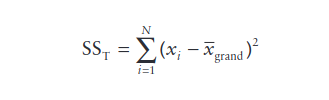

In [480]:
Image('sst1.png')

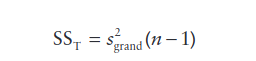

In [481]:
Image('sst2.png')

In [482]:
s_grand = data['libido'].std()
s_grand

1.7674302033770735

In [483]:
xBar_grand = data['libido'].mean()
xBar_grand

3.466666666666667

In [484]:
SSt = (s_grand**2) * (15-1)
SSt

43.73333333333333

In [485]:
# verifying it using 1st eqn:
SSt_ = 0
for i in range(15):
    SSt_ += (xBar_grand-data.iloc[i]['libido'])**2
    
print(SSt_)

43.73333333333333


##  **Planning Contrasts**

In [486]:
df = pd.read_csv('Contrast.csv')

In [487]:
df

,dose,libido,dummy1,dummy2
0,1,3,-2,0
1,1,2,-2,0
2,1,1,-2,0
3,1,1,-2,0
4,1,4,-2,0
5,2,5,1,-1
6,2,2,1,-1
7,2,4,1,-1
8,2,2,1,-1
9,2,3,1,-1


In [488]:
contrast_model = ols('libido~dummy1+dummy2', data=df).fit()
contrast_model.summary()

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0247
Time:                        05:01:56   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4667      0.362      9.574      0.000       2.678       4.256
dummy1         0.6333      0.256      2.474      0.029       0.075       1.191
dummy2         0.9000      0.443      2.029      0.065      -0.066       1.866
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         1.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

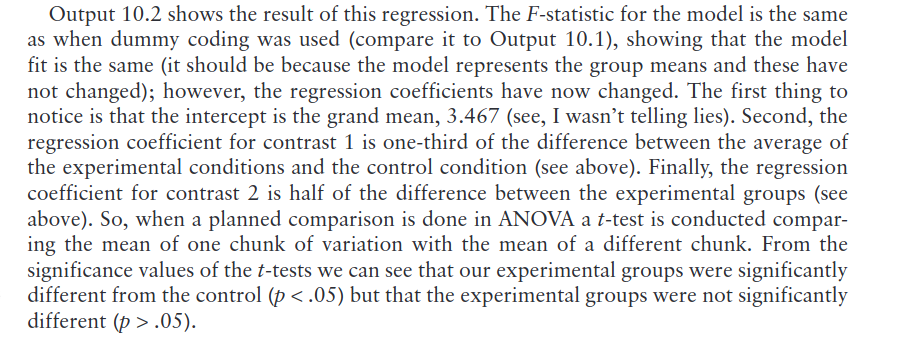

In [489]:
Image('contrsts.png')

In [490]:
data_1 = data[data['dose']==1]
data_2 = data[data['dose']==2]
data_3 = data[data['dose']==3]

In [491]:
stat, p = st.levene(data_1['libido'], data_2['libido'], data_3['libido'])
print(stat, p)

0.11764705882352934 0.8900225182757423


#### **since the above p value is not significant , i.e, p>.05, we can say that homogeneity of variance is maintained, can also verify manually**

In [492]:
data_1['libido'].std()

1.3038404810405297

In [493]:
data_2['libido'].std()

1.3038404810405297

In [494]:
data_3['libido'].std()

1.5811388300841898

### **Exploring the Data**

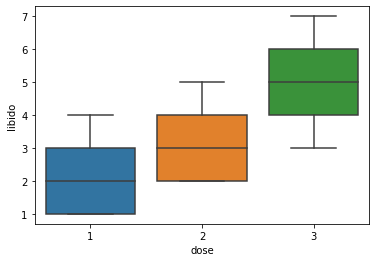

In [495]:
import seaborn as sns
_ = sns.boxplot(x='dose', y='libido', data=data)

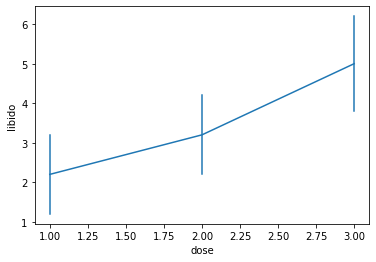

In [496]:
_ = sns.lineplot(x='dose', y='libido',err_style='bars', data=data)

In [497]:
st.describe(data_1['libido'])

DescribeResult(nobs=5, minmax=(1, 4), mean=2.2, variance=1.7, skewness=0.36317347441943004, kurtosis=-1.3719723183391002)

In [498]:
st.describe(data_2['libido'])

DescribeResult(nobs=5, minmax=(2, 5), mean=3.2, variance=1.7, skewness=0.36317347441943004, kurtosis=-1.3719723183391006)

In [499]:
st.describe(data_3['libido'])

DescribeResult(nobs=5, minmax=(3, 7), mean=5.0, variance=2.5, skewness=0.0, kurtosis=-1.3)

In [500]:
data['dosex'] = data['dose'].replace({1:'Placebo',2:'low', 3:'high'})

In [501]:
model  = ols('libido~C(dose)', data=data).fit()
model.summary()

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0247
Time:                        05:01:59   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2000      0.627      3.508      0.004       0.834       3.566
C(dose)[T.2]     1.0000      0.887      1.127      0.282      -0.932       2.932
C(dose)[T.3]     2.8000      0.887      3.157      0.008       0.868       4.732
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [502]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,20.133333,10.066667,5.118644,0.024694
Residual,12.0,23.600000,1.966667,NaN,NaN


In [503]:
prediction = pd.DataFrame(model.fittedvalues)
prediction.columns = ['predicted'] 
prediction.head()

,predicted
0,2.2
1,2.2
2,2.2
3,2.2
4,2.2


In [504]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [505]:
prediction.head()

,predicted,standarized_prediction
0,2.2,-1.056254
1,2.2,-1.056254
2,2.2,-1.056254
3,2.2,-1.056254
4,2.2,-1.056254


In [506]:
import statsmodels.stats.outliers_influence as sms

In [507]:
summary_frame = sms.OLSInfluence(model).summary_frame()

In [508]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

In [509]:
summary_frame .head()

,dfb_Intercept,dfb_C(dose)[T.2],dfb_C(dose)[T.3],cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,predicted,standarized_prediction
0,0.310630,-0.219649,-0.219649,0.033898,0.637793,0.2,0.318896,0.621261,0.310630,2.2,-1.056254
1,-0.076411,0.054031,0.054031,0.002119,-0.159448,0.2,-0.079724,-0.152822,-0.076411,2.2,-1.056254
2,-0.476513,0.336945,0.336945,0.076271,-0.956689,0.2,-0.478345,-0.953025,-0.476513,2.2,-1.056254
3,-0.476513,0.336945,0.336945,0.076271,-0.956689,0.2,-0.478345,-0.953025,-0.476513,2.2,-1.056254
4,0.754780,-0.533710,-0.533710,0.171610,1.435034,0.2,0.717517,1.509560,0.754780,2.2,-1.056254


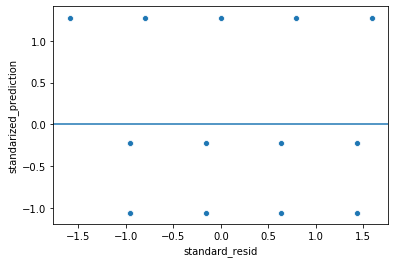

In [510]:
_ = sns.scatterplot(x = 'standard_resid', y='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

#### ***this graph can be used for testing homogeneity of variance. We encountered this kind of plot previously; essentially, if  it  has  a  funnel  shape  then  we’re  in  trouble.  The  plot  we  have  shows  points  that  are equally spread for the three groups, which implies that variances are similar across groups (which was also the conclusion reached by Levene’s test***

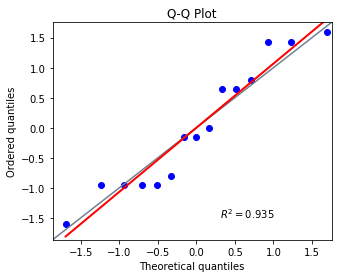

In [511]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

#### ***The second plot  is a Q-Q plot , which tells us something about the normality of residuals in the model. We want our residuals to be normally distributed, which means that the dots on the graph should cling lovingly to the diagonal line. Ours look like they have had a bit of an argument with the diagonal line, which suggests that we may not be able to assume normality of errors and should perhaps use a robust version of ANOVA instead***

### Doing welch test above same data (if the homogeneity of variance assumption were violated)

https://pingouin-stats.org/generated/pingouin.welch_anova.html

In [512]:
aov = pg.welch_anova(dv='libido', between='dose', data=data)

In [513]:
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,dose,2,7.943375,4.320451,0.053738,0.460366


## Robust ANOVA - for independent samples

In [514]:
st.kruskal(data_1['libido'], data_2['libido'], data_3['libido'])

KruskalResult(statistic=6.200000000000009, pvalue=0.0450492023935576)

## **Planned Comparisons**

### https://www.statsmodels.org/devel/examples/notebooks/generated/contrasts.html#examples-notebooks-generated-contrasts--page-root

In [515]:
grand_mean = data.groupby('dose').mean()['libido'].mean()
grand_mean

3.466666666666667

In [516]:
from patsy.contrasts import ContrastMatrix

In [517]:
contrast1 = [-2,1,1]
contrast2 = [0,-1,1]

In [518]:
contrast = np.vstack((contrast1, contrast2))

In [519]:
contrast = contrast.T

In [520]:
print(contrast)

[[-2  0]
 [ 1 -1]
 [ 1  1]]


In [521]:
mod_custom = ols("libido ~ C(dose, contrast)", data=data)
res_custom = mod_custom.fit()
print(res_custom.summary())

                            OLS Regression Results                            
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0247
Time:                        05:02:02   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [522]:
mod_helmert = ols("libido ~ C(dose, Helmert)", data=data)
res_helmert = mod_helmert.fit()
print(res_helmert.summary())

                            OLS Regression Results                            
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0247
Time:                        05:02:02   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.46

## Trend Analysis

In [523]:
from patsy.contrasts import Poly

In [524]:
levels = data.dose.unique().tolist()
contrast = Poly().code_without_intercept(levels)
print(contrast.matrix)

[[-7.07106781e-01  4.08248290e-01]
 [-4.43378006e-17 -8.16496581e-01]
 [ 7.07106781e-01  4.08248290e-01]]


In [525]:
mod_poly = ols("libido ~ C(dose, Poly)", data=data)
res_poly = mod_poly.fit()
print(res_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0247
Time:                        05:02:03   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## **Post Hoc Test using Python**

In [526]:
import statsmodels.stats.multitest as smt

In [527]:
s1,p1 = st.ttest_ind(data_1['libido'], data_2['libido'])
p1

0.2598450452137845

In [528]:
s2,p2 = st.ttest_ind(data_2['libido'], data_3['libido'])
p2

0.08513507177899203

In [529]:
s3,p3 = st.ttest_ind(data_3['libido'], data_1['libido'])
p3

0.015700141250047695

### https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

In [530]:
smt.multipletests([p1,p2,p3], alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)

(array([False, False,  True]),
 array([0.77953514, 0.25540522, 0.04710042]),
 0.016952427508441503,
 0.016666666666666666)

In [531]:
smt.multipletests([p1,p2,p3], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

(array([False, False,  True]),
 array([0.25984505, 0.12770261, 0.04710042]),
 0.016952427508441503,
 0.016666666666666666)

### another method to do the same using statsmodels

In [532]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [533]:
multicomp = MultiComparison(data['libido'], data['dose'])   # testfunc

#### https://pythonhealthcare.org/2018/04/13/55-statistics-multi-comparison-with-tukeys-test-and-the-holm-bonferroni-method/
#### https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html

In [534]:
# Bonferroni
com = multicomp.allpairtest(st.ttest_ind, method='bonf')
print(com[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -1.2127 0.2598    0.7795  False
     1      3 -3.0551 0.0157    0.0471   True
     2      3  -1.964 0.0851    0.2554  False
---------------------------------------------


In [535]:
# Holm
comp = multicomp.allpairtest(st.ttest_ind, method='Holm')
print (comp[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -1.2127 0.2598    0.2598  False
     1      3 -3.0551 0.0157    0.0471   True
     2      3  -1.964 0.0851    0.1703  False
---------------------------------------------


In [536]:
# Tukey HSD
co = multicomp.tukeyhsd(alpha=0.05)
co.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.0,0.5171,-1.3651,3.3651,False
1,3,2.8,0.0209,0.4349,5.1651,True
2,3,1.8,0.1472,-0.5651,4.1651,False


### **Dunnett Test**

### Rough start

In [537]:
df = data[['dose', 'libido']]

In [538]:
df['num'] = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]

/home/atrides/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [539]:
df = df.pivot( index='num', columns='dose', values='libido')

In [540]:
df.columns = ['placebo', 'low', 'high']
df.index = [1,2,3,4,5]
df

,placebo,low,high
1,3,5,7
2,2,2,4
3,1,4,5
4,1,2,3
5,4,3,6


In [541]:
df.loc['mean'] = df.mean()

In [542]:
df.loc['variance'] = df.head(5).std()**2

In [543]:
df

,placebo,low,high
1,3.0,5.0,7.0
2,2.0,2.0,4.0
3,1.0,4.0,5.0
4,1.0,2.0,3.0
5,4.0,3.0,6.0
mean,2.2,3.2,5.0
variance,1.7,1.7,2.5


In [544]:
p = 2
N = 5

In [545]:
dof = (p+1)*(N-1)
dof

12

In [546]:
long_data = list(np.array(df['placebo'].head(5))) + list(np.array(df['low'].head(5))) + list(np.array(df['high'].head(5)))
long_data

[3.0, 2.0, 1.0, 1.0, 4.0, 5.0, 2.0, 4.0, 2.0, 3.0, 7.0, 4.0, 5.0, 3.0, 6.0]

In [547]:
avg_var = 0
for i in range(len(long_data)):
    avg_var += i**2
    
avg_var  = (avg_var - 5*(((2.2)**2)+((3.2)**2)+(5**2)))/dof
avg_var

67.88333333333334

In [548]:
s = np.sqrt(avg_var)
s

8.239134258727269

In [549]:
se = s*np.sqrt(2/N)
se

5.210886041100241

In [550]:
Allowance = (2.11)*(se)
Allowance

10.994969546721508

In [551]:
breaking_strength_p1 = (3.2-2.2)-11
breaking_strength_p2 = (5-2.2)-11

In [552]:
print(abs(breaking_strength_p1) , abs(breaking_strength_p2))

10.0 8.2


In [553]:
a2 = 2.11*se
a2

10.994969546721508

### Rough End

## https://scikit-posthocs.readthedocs.io/en/latest/posthocs_api/

#### important posthoc library

In [554]:
import scikit_posthocs as sp

In [555]:
sp.posthoc_tukey_hsd(data['libido'], data['dose'])

,1,2,3
1,-1,0,1
2,0,-1,0
3,1,0,-1


In [556]:
sp.posthoc_tukey(data, val_col = 'libido', group_col='dose')

,1,2,3
1,-1.000000,0.517078,0.020851
2,0.517078,-1.000000,0.147239
3,0.020851,0.147239,-1.000000


### **Robust post hoc tests**

In [557]:
sp.posthoc_wilcoxon(data, val_col = 'libido', group_col='dose')

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,1,2,3
1,-1.000000,0.197466,0.038434
2,0.197466,-1.000000,0.041227
3,0.038434,0.041227,-1.000000


### from above table it seems that groups (1,3) and (2,3) are significant.

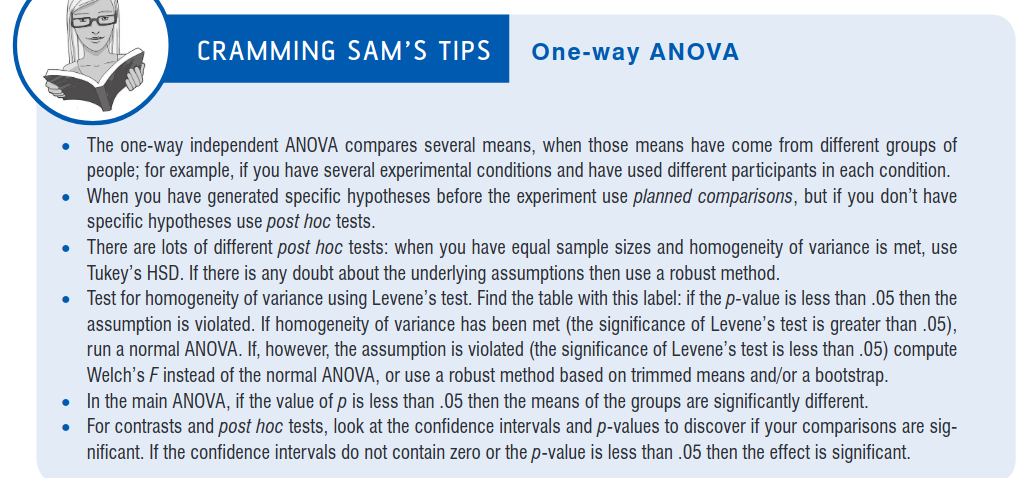

In [558]:
Image('oneWayAnova.png')

### **Calculating the effect size**

In [559]:
SSt

43.73333333333333

In [560]:
SSm = 20.133

In [561]:
R_squared = SSm/SSt    # here R_squared is called eta_squared
R_squared

0.4603582317073171

In [562]:
effect_size = np.sqrt(R_squared)   #R
effect_size

0.6784970388345973

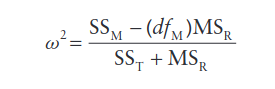

In [563]:
Image('omega.png')

In [564]:
ω_squared = (SSm-2*1.967)/(SSt+1.967)   # here ω_squared is like adjusted R_squared
ω_squared

0.3544613095455176

In [565]:
ω = np.sqrt(ω_squared)       # ω, more accurate measure of R
ω

0.5953665337802567

### https://www.rdocumentation.org/packages/compute.es/versions/0.2-5/topics/mes

In [566]:
def s_within(s1,s2,n1,n2):
    return np.sqrt((((n1-1)*(s1**2))+((n2-1)*(s2**2)))/(n1+n2-2))

def mes(m1, m2, s1, s2, n1, n2):
    s_ = s_within(s1,s2,n1,n2)
    d = (m1-m2)/s_   # cohen's D
    d_var = (n1+n2)/(n1*n2) + (d**2)/(2*(n1+n2))    # variance of d 
    
    df = n1+n2-2
    J = 1-3/(4*df-1)   # correction factor
    
    g = J*d          #   Hedges' g
    
    g_var = (J**2)*d_var     #   variance of g
    
    a = (n1+n2)**2/(n1*n2)    # a corrects for inbalance in n1 & n2
    
    r = d/np.sqrt(d**2+a)  # correlation coeffecient
    
    r_var = (a**2 * d_var)/((d**2 + a)**3)     #   variance of r
    
    
    print(f'Cohen\'s d: {d}, var.d: {d_var}')
    print(f'Hedge\'s g: {g}, var.g: {g_var}')
    print(f'Correlation coeffecient: {r}, var.r: {r_var}')
    
    

In [567]:
mes(2.2, 3.2, 1.3038405, 1.3038405, 5, 5)

Cohen's d: -0.766964977694741, var.d: 0.42941176385051477
Hedge's g: -0.6927425604984757, var.g: 0.35032135573236584
Correlation coeffecient: -0.358057432480627, var.r: 0.07113066705088723


In [568]:
mes(2.2, 5, 1.3038405, 1.5811388, 5, 5)

Cohen's d: -1.9321835766692816, var.d: 0.5866666686975249
Hedge's g: -1.7451980692496738, var.g: 0.47861255802170605
Correlation coeffecient: -0.6948083357346259, var.r: 0.020296034848250884


In [569]:
mes(3.2, 5, 1.3038405, 1.5811388, 5, 5)

Cohen's d: -1.2421180135731096, var.d: 0.4771428579821404
Hedge's g: -1.1219130445176473, var.g: 0.3892611869490094
Correlation coeffecient: -0.5275893456556138, var.r: 0.04482985658637296


#### The standard deviation of the effect size is of critical importance, since it indicates how much uncertainty is included in the measurement. A standard deviation that is too large will make the measurement nearly meaningless.

## Effect  sizes  for  the  orthogonal  contrasts

#### see above for model 

In [570]:
def r_contrast(t,df):
    return np.sqrt(t**2/(t**2+df))

In [571]:
dof = 15-2-1   # N-p-1 for normal regression , p is the number of predictors (in this case 2, the two con-trast variables
print(r_contrast(2.474, dof))

0.5811824584137868


In [572]:
dof = 15-2-1   # N-p-1 for normal regression , p is the number of predictors (in this case 2, the two con-trast variables
print(r_contrast(2.029, dof))

0.5054079701225639


#### Both effects are fairly large.

## **Reporting results from one-way independent ANOVA**

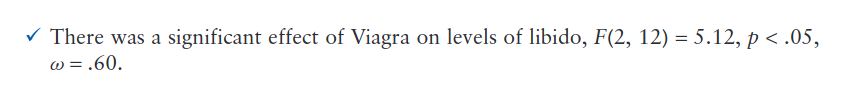

In [573]:
Image('report1.png')

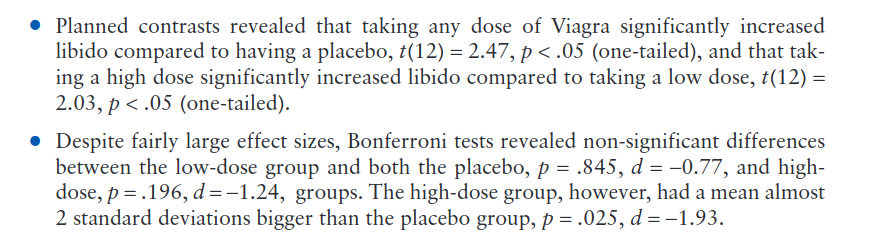

In [574]:
Image('report2.png')